In [ ]:
# Importing libraries
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister, Aer, IBMQ , execute
from qiskit import transpile 
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
import matplotlib.pyplot as plt
import random as rand

## Loading your IBM Quantum account(s)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-skku', group='unist', project='unist-graduate')
backend=provider.get_backend('ibm_lagos')
backend2=Aer.get_backend('statevector_simulator')
p=[]
parameter=[[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]]        
opt_parameter=[[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]]

def kd(a,b):
    if a==b:
        return 1
    else:
        return 0

def cU(para,opt_para,QR,QC,i,D):
    
    QC.crz(opt_para[0]-para[0],QR[0],QR[2*(i-1)+(D-1)+1])
    QC.rz(para[0],QR[2*(i-1)+(D-1)+1])
    QC.crx(opt_para[1]-para[1],QR[0],QR[2*(i-1)+(D-1)+1])
    QC.rx(para[1],QR[2*(i-1)+(D-1)+1])
    QC.crz(opt_para[2]-para[2],QR[0],QR[2*(i-1)+(D-1)+1])
    QC.rz(para[2],QR[2*(i-1)+(D-1)+1])
    
    QC.crz(opt_para[3]-para[3],QR[0],QR[2*(i-1)+(D-1)+2])
    QC.rz(para[3],QR[2*(i-1)+(D-1)+2])
    QC.crx(opt_para[4]-para[4],QR[0],QR[2*(i-1)+(D-1)+2])
    QC.rx(para[4],QR[2*(i-1)+(D-1)+2])
    QC.crz(opt_para[5]-para[5],QR[0],QR[2*(i-1)+(D-1)+2])
    QC.rz(para[5],QR[2*(i-1)+(D-1)+2])
    
    
    
    QC.cx(QR[2*(i-1)+(D-1)+1],QR[2*(i-1)+(D-1)+2])
    QC.crz(opt_para[6]-para[6],QR[0],QR[2*(i-1)+(D-1)+2])
    QC.rz(para[6],QR[2*(i-1)+(D-1)+2])
    QC.cx(QR[2*(i-1)+(D-1)+1],QR[2*(i-1)+(D-1)+2])
    
    
    
    QC.crz(-opt_para[2]+para[2],QR[0],QR[2*(i-1)+(D-1)+1])
    QC.rz(-para[2],QR[2*(i-1)+(D-1)+1])
    QC.crx(-opt_para[1]+para[1],QR[0],QR[2*(i-1)+(D-1)+1])
    QC.rx(-para[1],QR[2*(i-1)+(D-1)+1])
    QC.crz(-opt_para[0]+para[0],QR[0],QR[2*(i-1)+(D-1)+1])
    QC.rz(-para[0],QR[2*(i-1)+(D-1)+1])
    
    QC.crz(-opt_para[5]+para[5],QR[0],QR[2*(i-1)+(D-1)+2])
    QC.rz(-para[5],QR[2*(i-1)+(D-1)+2])
    QC.crx(-opt_para[4]+para[4],QR[0],QR[2*(i-1)+(D-1)+2])
    QC.rx(-para[4],QR[2*(i-1)+(D-1)+2])
    QC.crz(-opt_para[3]+para[3],QR[0],QR[2*(i-1)+(D-1)+2])
    QC.rz(-para[3],QR[2*(i-1)+(D-1)+2])
    
def cUpi(para,opt_para,QR,QC,i,D,K):
    
    QC.crz(opt_para[0]-para[0]-np.pi*kd(0,K),QR[0],QR[2*(i-1)+(D-1)+1])
    QC.rz(para[0]+np.pi*kd(0,K),QR[2*(i-1)+(D-1)+1])
    QC.crx(opt_para[1]-para[1]-np.pi*kd(1,K),QR[0],QR[2*(i-1)+(D-1)+1])
    QC.rx(para[1]+np.pi*kd(1,K),QR[2*(i-1)+(D-1)+1])
    QC.crz(opt_para[2]-para[2]-np.pi*kd(2,K),QR[0],QR[2*(i-1)+(D-1)+1])
    QC.rz(para[2]+np.pi*kd(2,K),QR[2*(i-1)+(D-1)+1])
    
    QC.crz(opt_para[3]-para[3]-np.pi*kd(3,K),QR[0],QR[2*(i-1)+(D-1)+2])
    QC.rz(para[3]+np.pi*kd(3,K),QR[2*(i-1)+(D-1)+2])
    QC.crx(opt_para[4]-para[4]-np.pi*kd(4,K),QR[0],QR[2*(i-1)+(D-1)+2])
    QC.rx(para[4]+np.pi*kd(4,K),QR[2*(i-1)+(D-1)+2])
    QC.crz(opt_para[5]-para[5]-np.pi*kd(5,K),QR[0],QR[2*(i-1)+(D-1)+2])
    QC.rz(para[5]+np.pi*kd(5,K),QR[2*(i-1)+(D-1)+2])
    
    
    
    QC.cx(QR[2*(i-1)+(D-1)+1],QR[2*(i-1)+(D-1)+2])
    QC.crz(opt_para[6]-para[6]-np.pi*kd(6,K),QR[0],QR[2*(i-1)+(D-1)+2])
    QC.rz(para[6]+np.pi*kd(6,K),QR[2*(i-1)+(D-1)+2])
    QC.cx(QR[2*(i-1)+(D-1)+1],QR[2*(i-1)+(D-1)+2])
    
    
    
    QC.crz(-opt_para[2]+para[2]+np.pi*kd(2,K),QR[0],QR[2*(i-1)+(D-1)+1])
    QC.rz(-para[2]-np.pi*kd(2,K),QR[2*(i-1)+(D-1)+1])
    QC.crx(-opt_para[1]+para[1]+np.pi*kd(1,K),QR[0],QR[2*(i-1)+(D-1)+1])
    QC.rx(-para[1]-np.pi*kd(1,K),QR[2*(i-1)+(D-1)+1])
    QC.crz(-opt_para[0]+para[0]+np.pi*kd(0,K),QR[0],QR[2*(i-1)+(D-1)+1])
    QC.rz(-para[0]-np.pi*kd(0,K),QR[2*(i-1)+(D-1)+1])
    
    QC.crz(-opt_para[5]+para[5]+np.pi*kd(5,K),QR[0],QR[2*(i-1)+(D-1)+2])
    QC.rz(-para[5]-np.pi*kd(5,K),QR[2*(i-1)+(D-1)+2])
    QC.crx(-opt_para[4]+para[4]+np.pi*kd(4,K),QR[0],QR[2*(i-1)+(D-1)+2])
    QC.rx(-para[4]-np.pi*kd(4,K),QR[2*(i-1)+(D-1)+2])
    QC.crz(-opt_para[3]+para[3]+np.pi*kd(3,K),QR[0],QR[2*(i-1)+(D-1)+2])
    QC.rz(-para[3]-np.pi*kd(3,K),QR[2*(i-1)+(D-1)+2])
    

def Hl(QC,QR,i):
    if i==0:
        QC.cx(QR[0],QR[1])
        QC.cx(QR[0],QR[2])
    elif i==1:
        QC.cx(QR[0],QR[3])
        QC.cx(QR[0],QR[4])
    elif i==2:
        QC.cy(QR[0],QR[1])
        QC.cy(QR[0],QR[2])
    elif i==3:
        QC.cy(QR[0],QR[3])
        QC.cy(QR[0],QR[4])
    elif i==4:
        QC.cz(QR[0],QR[1])
    elif i==5:
        QC.cz(QR[0],QR[2])
    elif i==6:
        QC.cz(QR[0],QR[3])
    elif i==7:
        QC.cz(QR[0],QR[4])
    elif i==8:
        QC.cz(QR[0],QR[1])
        QC.cz(QR[0],QR[3])
    elif i==9:
        QC.cz(QR[0],QR[2])
        QC.cz(QR[0],QR[4])
    
    
c=0.0125
numqubits=4+1
N=8
qr=QuantumRegister(numqubits)
cr=ClassicalRegister(numqubits)

for j in range(0,10*N):
    
    parameter=[[0,0,0,0,0,0,0],[0,0,0,0,0,0,0],[0,0,0,0,0,0,0]]
    for k in range (0,21):
        fd=0
        fdpi=0
        for i in range(1,3):
            qc = QuantumCircuit(qr,cr)

            qc.h(qr[0])
            if i==2:
                qc.s(qr[0])
            
            cU(parameter[0],opt_parameter[0],qr,qc,1,1)
            cU(parameter[1],opt_parameter[1],qr,qc,2,1)
            cU(parameter[2],opt_parameter[2],qr,qc,1,2)

            if i==2:
                Hl(qc,qr,j%10)

            qc.h(qr[0])

            qc.measure(qr[0],cr[0])

            result=execute(qc,backend=backend,shots=20000).result()

            if '00001' not in result.get_counts(qc):
                fd=fd+np.cos(c+(i-1)*np.pi/2)*(result.get_counts(qc)['00000'])/20000
            elif '00000' not in result.get_counts(qc):
                fd=fd+np.cos(c+(i-1)*np.pi/2)*(-1*result.get_counts(qc)['00001'])/20000
            else:
                fd=fd+np.cos(c+(i-1)*np.pi/2)*((result.get_counts(qc)['00000']-1*result.get_counts(qc)['00001'])/20000)
            
            
        for i in range(1,3):
            qc = QuantumCircuit(qr,cr)

            qc.h(qr[0])
            if i==2:
                qc.s(qr[0])

            cUpi(parameter[0],opt_parameter[0],qr,qc,1,1,k)
            cUpi(parameter[1],opt_parameter[1],qr,qc,2,1,k-7)
            cUpi(parameter[2],opt_parameter[2],qr,qc,1,2,k-14)

            if i==2:
                Hl(qc,qr,j%10)

            qc.h(qr[0])

            qc.measure(qr[0],cr[0])

            result=execute(qc,backend=backend,shots=20000).result()

            if '00001' not in result.get_counts(qc):
                fdpi=fdpi+np.cos(c+(i-1)*np.pi/2)*(result.get_counts(qc)['00000'])/20000
            elif '00000' not in result.get_counts(qc):
                fdpi=fdpi+np.cos(c+(i-1)*np.pi/2)*(-1*result.get_counts(qc)['00001'])/20000
            else:
                fdpi=fdpi+np.cos(c+(i-1)*np.pi/2)*((result.get_counts(qc)['00000']-1*result.get_counts(qc)['00001'])/20000)
    
        parameter[k//7][k%7]=parameter[k//7][k%7]+np.pi-2*np.arctan2(fd,fdpi)  
    opt_parameter=np.copy(parameter)
    
    print(j)
    p.append(fd)
    

ibmqfactory.load_account:WARNING:2022-06-29 02:45:43,640: Credentials are already in use. The existing account in the session will be replaced.


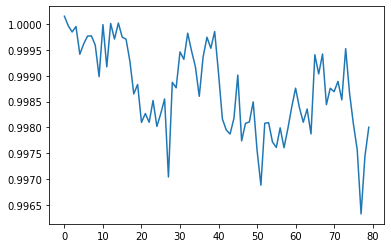

In [139]:
plt.figure(facecolor='white')
plt.plot(p)
plt.show()

In [140]:
parameter

[[1.5704505360303276,
  1.56998172282822,
  1.570699780232739,
  1.5707725198355516,
  1.5708451435807183,
  1.5706197222845684,
  0.023098759223798115],
 [1.5715130358294713,
  1.570786309921368,
  1.5698779108917347,
  1.5706121980756642,
  1.5699446272309006,
  1.5722916163086147,
  -0.0349146715035169],
 [1.5715341812265493,
  1.5703390366173848,
  1.5711556389885009,
  1.571665924040655,
  1.5719473569856388,
  1.570360488170409,
  -0.1439399619362116]]

In [83]:
p

[0.9969409602085987,
 0.9975299707049088,
 0.9988111551153663,
 0.9956231457850483,
 0.9998960026937204,
 0.9949043318613789,
 0.9995033290295136,
 0.9924118264463986,
 0.9850441336216748,
 0.99141016227874,
 0.9983219780357029,
 0.9989143185332034,
 0.9994367956247693,
 1.0015166473684014,
 0.9894434639565157,
 0.9869442985391548,
 0.9718129092243102,
 0.981373607214074,
 0.9815666140449871,
 0.985366943879947]

In [ ]:
p